In [1]:
!pip install neuralprophet[live]
# neuralprophet 설치

     |████████████████████████████████| 74 kB 2.3 MB/s 
     |████████████████████████████████| 172 kB 11.3 MB/s 
     |████████████████████████████████| 793 kB 43.5 MB/s 
     |████████████████████████████████| 793 kB 36.3 MB/s 
     |████████████████████████████████| 792 kB 38.8 MB/s 
     |████████████████████████████████| 792 kB 48.2 MB/s 
     |████████████████████████████████| 791 kB 44.8 MB/s 
     |████████████████████████████████| 790 kB 36.4 MB/s 
     |████████████████████████████████| 788 kB 44.8 MB/s 
     |████████████████████████████████| 787 kB 45.2 MB/s 
     |████████████████████████████████| 786 kB 35.4 MB/s 
     |████████████████████████████████| 786 kB 52.5 MB/s 
     |████████████████████████████████| 785 kB 45.0 MB/s 
     |████████████████████████████████| 785 kB 44.6 MB/s 
     |████████████████████████████████| 785 kB 28.5 MB/s 
     |████████████████████████████████| 785 kB 43.9 MB/s 
     |████████████████████████████████| 785 kB 39.5 MB/s 
     |██████████

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

import os
os.chdir("/content/drive/MyDrive/data")

import neuralprophet


covid_data = pd.read_csv('./서울시 코로나19 확진자 발생동향.csv', encoding = "cp949")
covid_data.head()

,서울시 기준일,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 사망,서울시 의심환자 전체,서울시 의심환자 검사중,서울시 의심환자 검사결과(음성),...,전국 의심환자 전체,전국 의심환자 검사중,전국 의심환자 검사결과(음성),자가격리자 해외입국자 감시중,자가격리자 해외입국자 감시해제,자가격리자 접촉자 감시중,자가격리자 접촉자 감시해제,확인중 확진자,서울시 당일사망자,전국 당일 사망자
0,2022.05.15.00,3565332,4025,0,NaN,NaN,4757,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.0,48.0
1,2022.05.14.00,3561307,4764,0,NaN,NaN,4745,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,17.0,55.0
2,2022.05.13.00,3556545,5178,0,NaN,NaN,4728,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,14.0,52.0
3,2022.05.12.00,3551375,5695,0,NaN,NaN,4714,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.0,63.0
4,2022.05.11.00,3545685,6208,0,NaN,NaN,4708,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0,29.0


- 시계열 데이터를 찾던중 코로나 19 확진자 데이터로 neuralprophet을 사용할 예정
- 일별 데이터이고 본격적인 코로나 시작이 2020년이므로 약 2년치의 데이터이다.(약간 적은감이 있다.)

In [4]:
print(covid_data.columns)

Index(['서울시 기준일', '서울시 확진자', '서울시 추가 확진', '서울시 치료중', '서울시 퇴원', '서울시 추가 퇴원',
       '서울시 사망', '서울시 의심환자 전체', '서울시 의심환자 검사중', '서울시 의심환자 검사결과(음성)', '전국 기준일',
       '전국 확진', '전국 추가 확진', '전국 치료중', '전국 퇴원', '전국 사망', '전국 의심환자 전체',
       '전국 의심환자 검사중', '전국 의심환자 검사결과(음성)', '자가격리자 해외입국자 감시중',
       '자가격리자 해외입국자 감시해제', '자가격리자 접촉자 감시중', '자가격리자 접촉자 감시해제', '확인중 확진자',
       '서울시 당일사망자', '전국 당일 사망자'],
      dtype='object')


In [5]:
covid_data.isnull().sum()

서울시 기준일                0
서울시 확진자                0
서울시 추가 확진              0
서울시 치료중                0
서울시 퇴원                61
서울시 추가 퇴원             61
서울시 사망                 0
서울시 의심환자 전체          645
서울시 의심환자 검사중         644
서울시 의심환자 검사결과(음성)    644
전국 기준일                 0
전국 확진                  0
전국 추가 확진               0
전국 치료중                 0
전국 퇴원                 61
전국 사망                  0
전국 의심환자 전체           645
전국 의심환자 검사중          644
전국 의심환자 검사결과(음성)     644
자가격리자 해외입국자 감시중      644
자가격리자 해외입국자 감시해제     644
자가격리자 접촉자 감시중        644
자가격리자 접촉자 감시해제       644
확인중 확진자               12
서울시 당일사망자            755
전국 당일 사망자            755
dtype: int64

In [6]:
covid_data_filter = covid_data[['전국 기준일' ,'전국 추가 확진']] # 추가확인은 그 전날의 일 확진자수를 의미한다. 즉, 1일치의 확진자 수 이다.
d = []

for i in covid_data_filter['전국 기준일']:
  d.append(i[:-3]) # 기준일 뒤로 00시 기준이라는 것이 있어서 그것을 빼준다.

covid_data_filter['전국 기준일'] = d
covid_data_filter = covid_data_filter[:-24] # 뒤에 24개는 2020.x.x이렇게 되있는게 아니라 20.x.x로 되어있어서 빼준다.
covid_data_filter['전국 기준일'] = pd.to_datetime(covid_data_filter['전국 기준일']) # 전국 기준일을 datetime으로 변경(년,월,일)

covid_data_filter = covid_data_filter.rename(columns = {
    '전국 기준일' : 'ds',
    '전국 추가 확진' : 'y' 
}) # ds, y로 변환

covid_data_filter = covid_data_filter.drop_duplicates().reset_index(drop = True)
covid_data_filter = covid_data_filter[covid_data_filter["y"]>0] # y가 0인 값들은 빼준다.
covid_data_filter = covid_data_filter.iloc[::-1].reset_index(drop = True)

# train과 test를 7일치빼서 적용해준다.
train = covid_data_filter[:-7]
test = covid_data_filter[-7:]

In [17]:
model = neuralprophet.NeuralProphet(n_changepoints = 120,
                                    changepoints_range = 0.9,
                                    yearly_seasonality = True, 
                                    weekly_seasonality = True, 
                                    num_hidden_layers = 3,
                                    epochs = 500)
history = model.fit(train,
                    freq = "D")

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.866% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


  0%|          | 0/123 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.33E-01, min: 5.17E-01


  0%|          | 0/123 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.12E-01, min: 5.17E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.14E-01
Epoch[500/500]: 100%|██████████| 500/500 [00:59<00:00,  8.46it/s, SmoothL1Loss=0.00474, MAE=8.86e+3, RMSE=1.54e+4, RegLoss=0]


In [18]:
history

,SmoothL1Loss,MAE,RMSE,RegLoss
0,1.043232,288942.786921,343606.912303,0.0
1,0.939475,267804.814790,319511.693406,0.0
2,0.835603,246427.886240,293425.835599,0.0
3,0.731661,224680.795907,269256.742557,0.0
4,0.627265,202254.371556,243388.775043,0.0
...,...,...,...,...
495,0.004748,8856.716787,15463.695646,0.0
496,0.004746,8853.050867,15069.735615,0.0
497,0.004746,8861.144082,15172.362583,0.0
498,0.004745,8860.863681,15278.438019,0.0


생각보다 MAE, RMSE가 안떨어진다. 데이터가 적어서 그런거같긴한데 2022년5월기준으로 일평균 확진자수가 3만명대 인것을 감안하면 RMSE 15000은 굉장히 큰 수치이다.

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 85.714% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 85.714% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


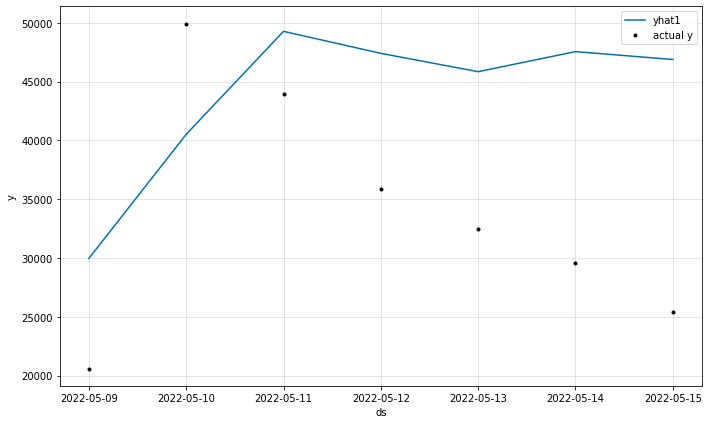

In [19]:
forecast = model.predict(test)
forecasts_plot = model.plot(forecast)

- 테스트 데이터와 엄청난 차이가 있다. 데이터를 조금더 모은뒤에 하거나 feature를 추가하던지 해야겠다.(multivariate variable)

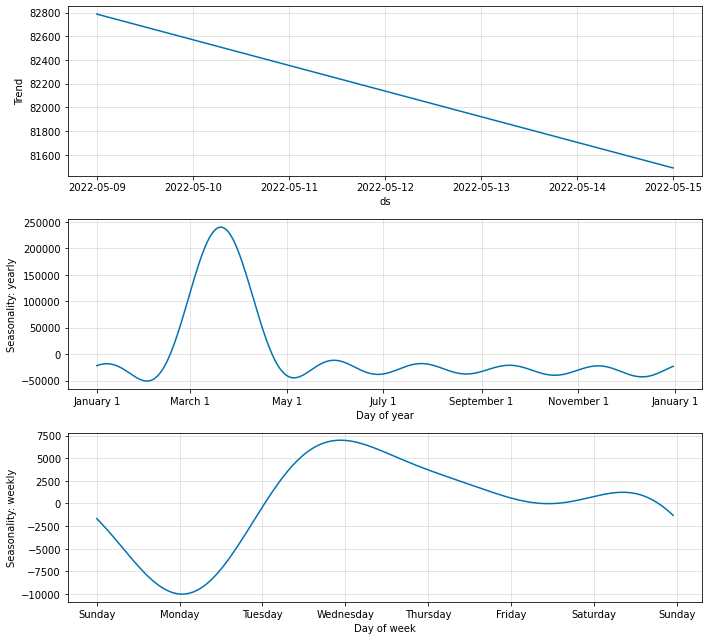

In [12]:
model.plot_components(forecast);

- trend를 보니까 계속 감소하고 있는건 확실해보이는데 왜 저런 그래프가 나왔는지 모르겠다.

In [20]:
RMSE = mean_squared_error(test['y'], forecast['yhat1'])**0.5
print("RMSE :",RMSE)

RMSE : 13627.604891304176


In [21]:
covid_data_filter = covid_data[['전국 기준일' ,'전국 추가 확진', '전국 치료중', '전국 사망']]
d = []

for i in covid_data_filter['전국 기준일']:
  d.append(i[:-3])

covid_data_filter['전국 기준일'] = d
covid_data_filter = covid_data_filter[:-24]
covid_data_filter['전국 기준일'] = pd.to_datetime(covid_data_filter['전국 기준일'])

covid_data_filter = covid_data_filter.rename(columns = {
    '전국 기준일' : 'ds',
    '전국 추가 확진' : 'y' 
})

covid_data_filter = covid_data_filter.drop_duplicates().reset_index(drop = True)
covid_data_filter = covid_data_filter[covid_data_filter["y"]>0]
covid_data_filter = covid_data_filter.iloc[::-1].reset_index(drop = True)


train = covid_data_filter[:-7]
test = covid_data_filter[-7:]

In [22]:
model = neuralprophet.NeuralProphet(n_changepoints = 120,
                                    changepoints_range = 0.9,
                                    yearly_seasonality = True, 
                                    weekly_seasonality = True, 
                                    epochs = 500)
model.add_future_regressor('전국 치료중')
model.add_future_regressor('전국 사망')
history = model.fit(train,
                    freq = "D")

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.866% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


  0%|          | 0/123 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.62E-01, min: 1.02E+00


  0%|          | 0/123 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.21E-01, min: 1.21E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.80E-01
Epoch[500/500]: 100%|██████████| 500/500 [01:05<00:00,  7.60it/s, SmoothL1Loss=0.00479, MAE=9.03e+3, RMSE=1.56e+4, RegLoss=0]


- 데이터 내에 별다른 변수가 없어서 치료중이랑 사망을 넣어보았다.


In [23]:
history # 위랑 별 차이 없어보인다.

,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.920622,262023.889245,334986.943328,0.0
1,0.799357,236871.877767,302114.577741,0.0
2,0.684468,212706.285822,271114.768895,0.0
3,0.566249,187679.863973,238597.694204,0.0
4,0.450148,161919.662420,201559.926736,0.0
...,...,...,...,...
495,0.004798,9049.885264,15802.869123,0.0
496,0.004795,9032.181503,15554.409733,0.0
497,0.004793,9034.756777,15615.409485,0.0
498,0.004793,9033.318359,14914.556665,0.0


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 85.714% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 85.714% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


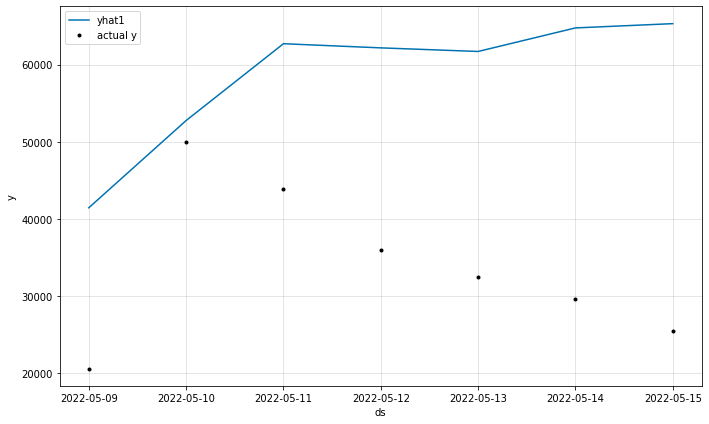

In [24]:
forecast = model.predict(test)
forecasts_plot = model.plot(forecast)

In [25]:
RMSE = mean_squared_error(test['y'], forecast['yhat1'])**0.5
print("RMSE :",RMSE)

RMSE : 27165.100616452204
